In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
train_data=pd.read_csv('data/Cleaned Data/train_cleaned.csv')
train_data.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Sex,Name,Family,Has_Cabin,Ticket_Number
0,1,0,3,22.0,7.2500,0,1,Owen Braund,1,0,5
1,2,1,1,38.0,71.2833,1,0,Florence Briggs Thayer Cumings,1,1,17599
2,3,1,3,26.0,7.9250,0,0,Laina Heikkinen,0,0,2
3,4,1,1,35.0,53.1000,0,0,Lily May Peel Futrelle,1,1,113803
4,5,0,3,35.0,8.0500,0,1,William Allen,0,0,373450


## Logistic Regression Model

In [7]:
# Making The Model
x_train=train_data[['Age','Sex','Pclass','Has_Cabin']]
y_train=train_data['Survived']
model = LogisticRegression()
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_train)

# Model evaluation (represents how much each feature affects the prediction)
print("Model Coefficients:", model.coef_)

print("\nAccuracy:", accuracy_score(y_train, y_pred))

# Confusion Matrix 
# [[True Negatives, False Positives
#   False Negatives, True Positives]]
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred))

print("\nClassification Report:\n", classification_report(y_train, y_pred))

# Predict probabilities
y_prob = model.predict_proba(x_train)[:, 1]  # Probability of survival
print("\nFirst 5 predicted probabilities:", y_prob[:5])

Model Coefficients: [[-0.03673941 -2.47931701 -0.99972696  0.62313127]]

Accuracy: 0.8035914702581369

Confusion Matrix:
 [[465  84]
 [ 91 251]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       549
           1       0.75      0.73      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891


First 5 predicted probabilities: [0.1104663  0.91894399 0.56128345 0.92678376 0.07151817]


Text(0, 0.5, 'Count')

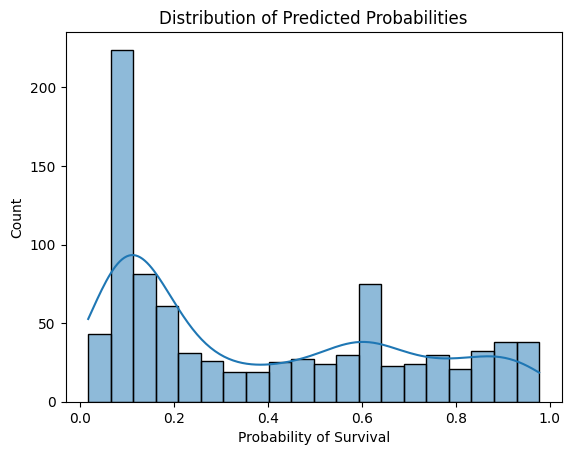

In [8]:
# HistoGram for seeing what %  of people survived
probabilities = model.predict_proba(x_train)[:, 1]  # Survival probabilities
sns.histplot(probabilities, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Survival')
plt.ylabel('Count')

In [9]:
test_data=pd.read_csv('data/Cleaned Data/test_cleaned.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket_Number,Fare,Embarked,Family,Has_Cabin
0,892,3,Kelly James,1,35,330911,7.8292,2,0,0
1,893,3,Wilkes Needs,0,47,363272,7.0000,0,1,0
2,894,2,Myles Francis,1,62,240276,9.6875,2,0,0
3,895,3,Wirz Albert,1,27,315154,8.6625,0,0,0
4,896,3,Hirvonen Lindqvist,0,22,3101298,12.2875,0,2,0


In [10]:
x_test=test_data[['Age','Sex','Pclass','Has_Cabin']]
test_res=model.predict(x_test)
# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_res
})

print(x_test.isnull().sum())


Age          0
Sex          0
Pclass       0
Has_Cabin    0
dtype: int64


In [11]:
#submission.to_csv('logistic_submission.csv', index=False)

#### Trying to increase accuracy of Logistic Regression

In [ ]:
# Creating new features
train_data1=train_data.copy()
test_data1=test_data.copy()
for df in [train_data1, test_data1]:
    df['Age*Class'] = df['Age'] * df['Pclass']

In [14]:
# Making The Model
x_train1=train_data1[['Age*Class','Sex','Pclass','Has_Cabin']]
y_train1=train_data1['Survived']
model = LogisticRegression()
model.fit(x_train1, y_train1)

y_pred = model.predict(x_train1)

print("\nAccuracy:", accuracy_score(y_train, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))


Accuracy: 0.7968574635241302

Confusion Matrix:
 [[468  81]
 [100 242]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



In [22]:
from sklearn.preprocessing import StandardScaler

age_scaler = StandardScaler().fit(train_data1[['Age']])
train_data1['Age_scaled'] = age_scaler.transform(train_data1[['Age']])
test_data1['Age_scaled'] = age_scaler.transform(test_data1[['Age']])

x_train1=train_data1[['Sex','Pclass','Has_Cabin','Age_scaled','Family','Embarked']]
y_train1=train_data1['Survived']
model = LogisticRegression()
model.fit(x_train1, y_train1)

y_pred1 = model.predict(x_train1)

print("\nAccuracy:", accuracy_score(y_train, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))


Accuracy: 0.8125701459034792

Confusion Matrix:
 [[478  71]
 [ 96 246]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.78      0.72      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



In [24]:
x_test1=test_data1[['Sex','Pclass','Has_Cabin','Age_scaled','Family','Embarked']]
test_res=model.predict(x_test1)
# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_res
})
submission.to_csv('logistic_updated_submission.csv', index=False)

### Decision Trees

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load cleaned data
data2 = pd.read_csv('data/Cleaned Data/train_cleaned.csv')

# Features and target
X = data2[['Sex', 'Pclass', 'Has_Cabin', 'Family', 'Embarked', 'Age']]  # Removed scaled age (not needed for trees)
y = data2['Survived']

# 1. Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Initialize and train Decision Tree

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# 3. Evaluate on TEST set 
y_pred = dt.predict(X_test)
print("=== Test Set Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Cross-Validation 
print("\n=== Cross-Validation ===")
cv_scores = cross_val_score(dt, X, y, cv=5)
print("CV Accuracy (Mean):", cv_scores.mean())
print("CV Scores:", cv_scores)

# 5. Hyperparameter Tuning 
print("\n=== Hyperparameter Tuning ===")
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

#  Retrain with best parameters
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)
y_pred_best = best_dt.predict(X_test)
print("\n=== Best Model Test Accuracy ===")
print(accuracy_score(y_test, y_pred_best))

=== Test Set Evaluation ===
Accuracy: 0.8044692737430168

Confusion Matrix:
 [[92 13]
 [22 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


=== Cross-Validation ===
CV Accuracy (Mean): 0.8047015253279769
CV Scores: [0.81564246 0.81460674 0.80337079 0.78089888 0.80898876]

=== Hyperparameter Tuning ===
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best CV Score: 0.8202009258347285

=== Best Model Test Accuracy ===
0.8044692737430168


### Random Forest

In [3]:
data2.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Sex,Name,Family,Has_Cabin,Ticket_Number
0,1,0,3,22.0,7.2500,0,1,Owen Braund,1,0,5
1,2,1,1,38.0,71.2833,1,0,Florence Briggs Thayer Cumings,1,1,17599
2,3,1,3,26.0,7.9250,0,0,Laina Heikkinen,0,0,2
3,4,1,1,35.0,53.1000,0,0,Lily May Peel Futrelle,1,1,113803
4,5,0,3,35.0,8.0500,0,1,William Allen,0,0,373450


=== Best Parameters ===
{'class_weight': {0: 0.3, 1: 0.7}, 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

=== Test Set Performance ===
Accuracy: 0.8436
AUC-ROC: 0.9049

Confusion Matrix:
[[90 15]
 [13 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.80      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



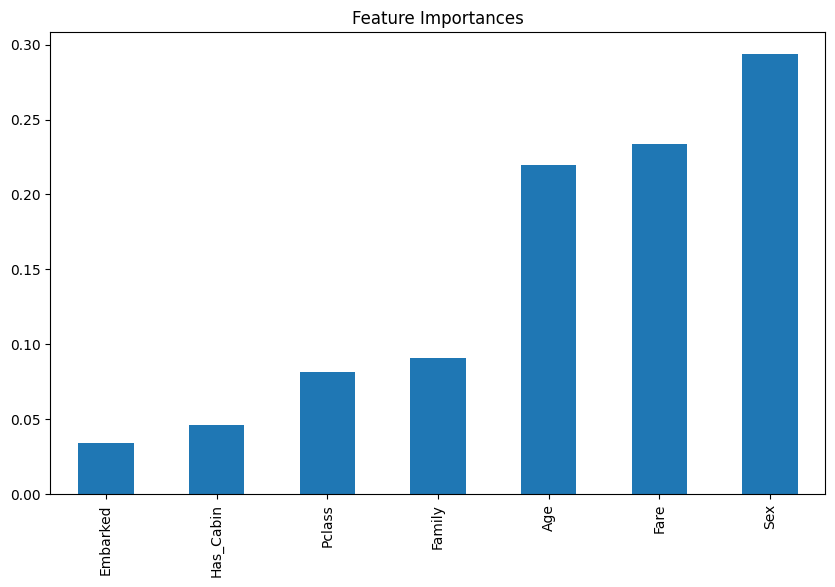

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Load cleaned data
data3 = pd.read_csv('data/Cleaned Data/train_cleaned.csv')

# Select features (modify based on your cleaned dataset)
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked', 'Has_Cabin']
X = pd.get_dummies(data3[features])  # One-hot encode categoricals
y = data3['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and tune Random Forest
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [{0:0.5, 1:0.5}, {0:0.4, 1:0.6}, {0:0.3, 1:0.7}]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print("=== Best Parameters ===")
    print(grid_search.best_params_)
    
    print("\n=== Test Set Performance ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    plt.figure(figsize=(10,6))
    pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='bar')
    plt.title("Feature Importances")
    plt.show()

evaluate_model(best_rf, X_test, y_test)



In [12]:
data3.head()


,PassengerId,Survived,Pclass,Age,Fare,Embarked,Sex,Name,Family,Has_Cabin,Ticket_Number
0,1,0,3,22.0,7.2500,0,1,Owen Braund,1,0,5
1,2,1,1,38.0,71.2833,1,0,Florence Briggs Thayer Cumings,1,1,17599
2,3,1,3,26.0,7.9250,0,0,Laina Heikkinen,0,0,2
3,4,1,1,35.0,53.1000,0,0,Lily May Peel Futrelle,1,1,113803
4,5,0,3,35.0,8.0500,0,1,William Allen,0,0,373450


In [11]:
test_data = pd.read_csv('data/Cleaned Data/test_cleaned.csv')  
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket_Number,Fare,Embarked,Family,Has_Cabin
0,892,3,Kelly James,1,35,330911,7.8292,2,0,0
1,893,3,Wilkes Needs,0,47,363272,7.0000,0,1,0
2,894,2,Myles Francis,1,62,240276,9.6875,2,0,0
3,895,3,Wirz Albert,1,27,315154,8.6625,0,0,0
4,896,3,Hirvonen Lindqvist,0,22,3101298,12.2875,0,2,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
data = pd.read_csv('data/Cleaned Data/train_cleaned.csv')
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare']
X = pd.get_dummies(data[features])
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optimized Random Forest parameters based on learning curve analysis
param_grid = {
    'n_estimators': [80, 100],  # Reduced to prevent overfitting
    'max_depth': [3, 4],        # Shallower trees
    'min_samples_split': [10, 12],
    'min_samples_leaf': [4, 5],
    'max_features': ['sqrt'],   # Limit features per split
    'class_weight': ['balanced']
}

# Configure GridSearch
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Enhanced evaluation with learning curves
def plot_learning_curve(estimator, title, X, y, cv=5):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.ylim(0.75, 0.92)  # Adjusted based on your plot range
    plt.grid()

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print("=== Best Parameters ===")
    print(grid_search.best_params_)
    
    print("\n=== Test Set Performance ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
    
    print("\n=== Classification Report ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Feature importance
    plt.figure(figsize=(8, 4))
    pd.Series(model.feature_importances_, index=X.columns
             ).sort_values().plot(kind='barh', color='teal')
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

# Plot learning curves before evaluation
plot_learning_curve(best_rf, "Learning Curves (Random Forest)", X_train, y_train)
plt.show()

# Final evaluation
evaluate_model(best_rf, X_test, y_test)

# Optional: Compare with simpler model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
print("\n=== Logistic Regression Comparison ===")
print(f"Test Accuracy: {accuracy_score(y_test, lr.predict(X_test)):.4f}")

In [22]:

# Load the test data
test_data = pd.read_csv('data/Cleaned Data/test_cleaned.csv')

# Prepare test features 
X_submission = pd.get_dummies(test_data[features])

# Ensure all dummy variables from training are present in test set
# Add missing columns with 0 values
missing_cols = set(X.columns) - set(X_submission.columns)
for c in missing_cols:
    X_submission[c] = 0
# Ensure the order of columns is the same as in training
X_submission = X_submission[X.columns]

# Make predictions
predictions = best_rf.predict(X_submission)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})


# Save to CSV
submission_file = 'Submissions/random_forest_updated_2_submission.csv'
submission.to_csv(submission_file, index=False)

print(f"\nSubmission file saved to {submission_file}")
print(f"Number of predictions: {len(predictions)}")
print(f"Survival rate in predictions: {predictions.mean():.2%}")


Submission file saved to Submissions/random_forest_updated_2_submission.csv
Number of predictions: 418
Survival rate in predictions: 40.67%
